In [1]:
import sys
sys.path.append('../sample/')
from sam import SAM

from random import uniform, gauss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_state(dim):
  
    return np.array([uniform(-10, 10) for i in range(dim)])

In [3]:
def N(mu, sigma):
    """ float * float -> ([float] -> float)
    """
    
    def result(x):
        
        x = np.array(x)
        
        return np.exp(- np.sum(np.square((x - mu) / sigma)))
        
    return result


## Recall SimulatedAnnealing is searching the argmin, instead of argmax.
def target_function(x):
    """ [float] -> float
    """
    return 1 * N(-5, 5)(x) + 100 * N(5, 5)(x)

def log_target_distribution(T):
    """ float -> ([float] -> float)
    """
    return lambda x: np.log(target_function(x))

In [4]:
def sampling(iterations, init_step_size, beta, burn_in, dim, T):
    
    def initialize_state_0():
        return initialize_state(dim)
    
    sam = SAM(iterations,
              initialize_state_0,
              init_step_size,
              beta,
              burn_in
              )
    chain = sam.sampling(log_target_distribution(T))
    
    return chain, sam

In [5]:
dim = 1

## Needs tuning
iterations = int(10 ** 4 * 5)
burn_in = int(0.5 * iterations)
init_step_size = 0.5
beta = 2
T = 1


chain, sam = sampling(iterations, init_step_size, beta, burn_in, dim, T)

expect = [np.mean([state[axis] for state in chain])
          for axis in range(dim)
         ]

print('Expects: {0}'.format(expect))

Initial state: [-1.07151131]


/Users/shuiruge/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log


Accept-ratio: 0.41336
Expects: [9.0197340764533873]


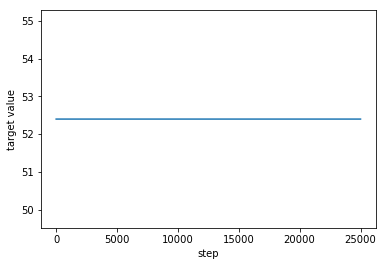

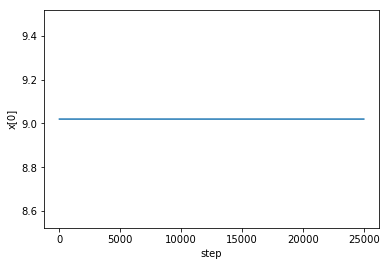

In [6]:
steps = np.arange(len(chain))
targets = [target_function(state) for state in chain]


plt.plot(steps, targets)
plt.xlabel('step')
plt.ylabel('target value')
plt.show()


for axis in range(dim):
    
    xs = [state[axis] for state in chain]

    plt.plot(steps, xs)
    plt.xlabel('step')
    plt.ylabel('x[{0}]'.format(axis))
    plt.show()

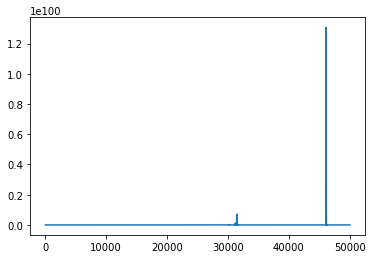

In [7]:
plt.plot(sam.step_size_list)
plt.show()

Splendid, even for `dim = 10`.